In [38]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, LineString
from tqdm.auto import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

### Loading data

In [39]:
gdf_shp = gpd.read_file("roads.shp")

In [40]:
# Projecting to the Bangladesh system
gdf_shp = gdf_shp.to_crs('EPSG:9678')

<Axes: >

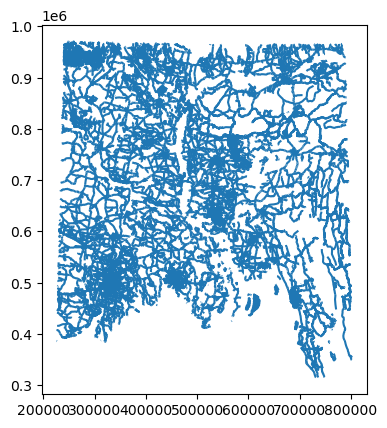

In [41]:
gdf_shp.plot()

In [42]:
# Importing own dataset
roads_df = pd.read_csv('N1_N2_v4.csv')

In [65]:
roads_df

,road,id,model_type,condition,name,lat,lon,length
0,N1,1000000,sourcesink,NaN,Start of Road after Jatrabari Flyover infront...,23.70602780,90.44333300,0.0
1,N1,1000001,link,NaN,Box Culvert,23.70291670,90.45041670,0.0
2,N1,1000002,link,NaN,Intersection with Z1101,23.70277780,90.45047220,8.0
3,N1,1000003,link,NaN,Km post missing,23.70213890,90.45197220,178.0
4,N1,1000004,bridge,A,.,23.69873866,90.45886108,11.3
...,...,...,...,...,...,...,...,...
8198,Z1402,1008198,link,NaN,Box Culvert,23.51944380,90.78166600,299.0
8199,Z1402,1008199,link,D,ISAPUR BOX CULVERT,23.53049930,90.77311040,9.4
8200,Z1402,1008200,link,NaN,Km post missing,23.52438820,90.78236040,571.0
8201,Z1402,1008201,link,NaN,Box Culvert,23.52574930,90.78227710,155.0


In [7]:
roads_gdf = gpd.GeoDataFrame(roads_df,  geometry=gpd.points_from_xy(roads_df.lon, roads_df.lat), crs="EPSG:4326")

In [44]:
# Projecting to the Bangladesh system
roads_gdf = roads_gdf.to_crs('EPSG:9678')

In [67]:
roads_gdf.bounds

,minx,miny,maxx,maxy
0,545477.2643550605,621455.6187047744,545477.2643550605,621455.6187047744
1,546200.4798789166,621113.4498007651,546200.4798789166,621113.4498007651
2,546206.1864014524,621098.0899144537,546206.1864014524,621098.0899144537
3,546359.3276417017,621027.8407099498,546359.3276417017,621027.8407099498
4,547062.8274642059,620653.6402354152,547062.8274642059,620653.6402354152
...,...,...,...,...
8198,580081.1798521228,600946.3070021239,580081.1798521228,600946.3070021239
8199,579201.1393580394,602165.5664085951,579201.1393580394,602165.5664085951
8200,580149.0884811026,601494.1036572205,580149.0884811026,601494.1036572205
8201,580139.7633714431,601644.7491525975,580139.7633714431,601644.7491525975


In [68]:
# Setting the bounds for filtering later on
min_latitude = roads_gdf.bounds['miny'].min()
max_latitude = roads_gdf.bounds['maxy'].max()

min_longitude = roads_gdf.bounds['minx'].min()
max_longitude = roads_gdf.bounds['maxx'].max()

<Axes: >

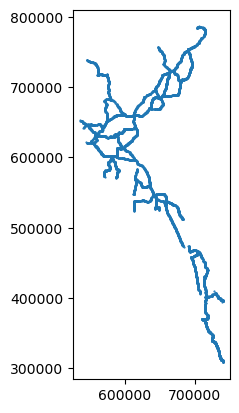

In [69]:
roads_gdf.plot(markersize=0.3)

### Filter shapefile

In [70]:
# Calculate the bounds for each geometry
bounds = gdf_shp.geometry.bounds

# Filter the shapefile
filtered_gdf = gdf_shp[
    (bounds['minx'] >= min_longitude) & 
    (bounds['maxx'] <= max_longitude) & 
    (bounds['miny'] >= min_latitude) & 
    (bounds['maxy'] <= max_latitude)
]


<Axes: >

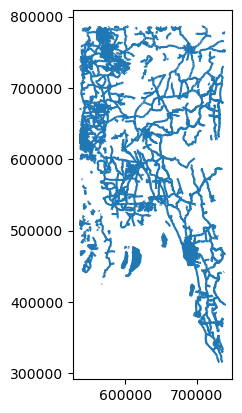

In [71]:
filtered_gdf.plot()

In [73]:
filtered_gdf

,osm_id,name,ref,type,oneway,bridge,maxspeed,geometry
0,8656088,Park Rd,NaN,residential,0,0,NaN,"LINESTRING (543331.341 631584.816, 543310.339 ..."
1,8656089,Embassy Rd,NaN,residential,0,0,NaN,"LINESTRING (542957.860 631594.847, 543103.065 ..."
2,8656151,Dutabash Rd,NaN,residential,0,0,NaN,"LINESTRING (542922.348 631760.569, 543007.726 ..."
3,8656152,Road 1,NaN,residential,0,0,NaN,"LINESTRING (542992.732 631853.067, 543128.388 ..."
4,8656154,Road 2,NaN,residential,0,0,NaN,"LINESTRING (543117.997 631961.239, 543157.270 ..."
...,...,...,...,...,...,...,...,...
112695,447948292,NaN,NaN,residential,0,0,NaN,"LINESTRING (542196.953 625552.798, 542136.150 ..."
112710,448000708,NaN,NaN,residential,0,0,NaN,"LINESTRING (722906.512 507379.890, 722918.439 ..."
112711,448022611,NaN,NaN,residential,0,0,NaN,"LINESTRING (537778.015 632797.268, 537738.322 ..."
112712,448025458,NaN,NaN,residential,0,0,NaN,"LINESTRING (538290.679 630203.108, 538357.169 ..."


In [74]:
filtered_gdf['type'].unique()

array(['residential', 'primary', 'unclassified', 'service', 'secondary',
       'tertiary', 'track', 'trunk', 'primary_link', 'living_street',
       'pedestrian', 'road', 'footway', 'tertiary_link', 'path',
       'secondary_link', 'steps', 'bridleway', 'construction', 'cycleway',
       'yes', 'minor', 'rest_area', 'motorway', 'motorway_link', 'Lane',
       'corridor', 'trunk_link'], dtype=object)

In [75]:
# Filter for only the relevant roads
filtered_gdf = filtered_gdf[(filtered_gdf['type'] == 'trunk') | (filtered_gdf['type'] == 'primary') | (filtered_gdf['type'] == 'secondary')]


filtered_gdf

,osm_id,name,ref,type,oneway,bridge,maxspeed,geometry
22,10101968,Dhaka - Mymensingh Road,NaN,primary,1,0,NaN,"LINESTRING (541124.650 640755.309, 541109.136 ..."
23,10101976,Dhaka - Mymensingh Road,NaN,primary,1,0,NaN,"LINESTRING (541072.592 640102.381, 541074.228 ..."
65,11075214,Kamal Ataturk,NaN,secondary,0,0,NaN,"LINESTRING (541044.636 631212.054, 541070.590 ..."
66,11075217,North Avenue,NaN,secondary,1,0,50.0,"LINESTRING (542485.001 631285.080, 542499.309 ..."
69,11075272,Road 11,NaN,secondary,0,0,NaN,"LINESTRING (541067.067 630890.961, 541077.148 ..."
...,...,...,...,...,...,...,...,...
112323,444888104,NaN,NaN,primary,1,0,NaN,"LINESTRING (538819.886 626442.444, 538830.508 ..."
112537,445849811,NaN,NaN,secondary,0,0,NaN,"LINESTRING (599741.026 765457.368, 599779.846 ..."
112559,446580220,Rampura-Banasree Road- Ideal School,NaN,secondary,0,0,NaN,"LINESTRING (545395.700 627670.488, 545481.744 ..."
112653,447739109,NaN,NaN,secondary,1,0,NaN,"LINESTRING (541918.644 624935.972, 541940.812 ..."


### Finding intersections in shapefile

In [76]:
def find_self_intersections(gdf):
    intersections = []
    spatial_index = gdf.sindex

    # Initialize progress bar
    progress_bar = tqdm(total=len(gdf), desc='Finding Intersections')

    for index, geometry in gdf.iterrows():
        # (Only) get the geometries that are likely to intersect with the current geometry
        # the spatial index feature of Geopandas is used, as it makes the code far more efficient
        # as only geometries that have the possiblity to intersect based on neighboring bounds are checked
        possible_matches_index = list(spatial_index.intersection(geometry.geometry.bounds))
        # Filter out the current geometry from the list of possible matches
        possible_matches = gdf.iloc[possible_matches_index].drop(index)
        # Check for intersection using the geopandas intersection function with each possible geometry
        for other_index, other_geometry in possible_matches.iterrows():
            if geometry.geometry.intersects(other_geometry.geometry):
                intersection = geometry.geometry.intersection(other_geometry.geometry)
                if not intersection.is_empty:
                    intersections.append(intersection)

        # Update the progress bar
        progress_bar.update(1)

    progress_bar.close()
    intersections_gdf = gpd.GeoDataFrame(geometry=intersections, crs=gdf.crs)

    return intersections_gdf

intersections_gdf = find_self_intersections(filtered_gdf)


Finding Intersections:   0%|          | 0/2707 [00:00<?, ?it/s]

In [77]:
intersections_gdf

,geometry
0,POINT (541124.650 640755.309)
1,POINT (541059.704 640770.901)
2,POINT (541109.136 640754.933)
3,POINT (541124.650 640755.309)
4,POINT (541049.952 638578.341)
...,...
7373,POINT (545395.700 627670.488)
7374,"MULTILINESTRING ((541918.644 624935.972, 54194..."
7375,POINT (541960.837 624954.062)
7376,"MULTILINESTRING ((541918.644 624935.972, 54194..."


<Axes: >

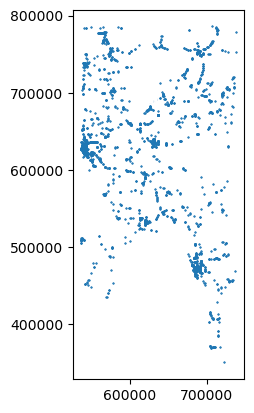

In [78]:
intersections_gdf.plot(markersize=0.2)

### Calculate distances between intersections

In [79]:
roads_df

,road,id,model_type,condition,name,lat,lon,length
0,N1,1000000,sourcesink,NaN,Start of Road after Jatrabari Flyover infront...,23.70602780,90.44333300,0.0
1,N1,1000001,link,NaN,Box Culvert,23.70291670,90.45041670,0.0
2,N1,1000002,link,NaN,Intersection with Z1101,23.70277780,90.45047220,8.0
3,N1,1000003,link,NaN,Km post missing,23.70213890,90.45197220,178.0
4,N1,1000004,bridge,A,.,23.69873866,90.45886108,11.3
...,...,...,...,...,...,...,...,...
8198,Z1402,1008198,link,NaN,Box Culvert,23.51944380,90.78166600,299.0
8199,Z1402,1008199,link,D,ISAPUR BOX CULVERT,23.53049930,90.77311040,9.4
8200,Z1402,1008200,link,NaN,Km post missing,23.52438820,90.78236040,571.0
8201,Z1402,1008201,link,NaN,Box Culvert,23.52574930,90.78227710,155.0


In [80]:
# Filter own dataset for intersections
own_intersections = roads_df[roads_df['model_type'] == 'intersection']
own_intersections = own_intersections.reset_index(drop=True)

In [90]:
own_int_gdp = gpd.GeoDataFrame(
    own_intersections,
    geometry=gpd.points_from_xy(own_intersections.lon, own_intersections.lat, crs = "EPSG:4326")
)
# Projecting dataframe with own intersections to Bangladesh system
own_int_gdp = own_int_gdp.to_crs("EPSG:9678")


In [91]:
own_int_gdp.crs

<Projected CRS: EPSG:9678>
Name: Gulshan 303 / Bangladesh Transverse Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Bangladesh - onshore.
- bounds: (88.01, 20.52, 92.67, 26.64)
Coordinate Operation:
- name: Bangladesh Transverse Mercator
- method: Transverse Mercator
Datum: Gulshan 303
- Ellipsoid: Everest 1830 (1937 Adjustment)
- Prime Meridian: Greenwich

In [92]:
intersections_gdf

,geometry
0,POINT (541124.650 640755.309)
1,POINT (541059.704 640770.901)
2,POINT (541109.136 640754.933)
3,POINT (541124.650 640755.309)
4,POINT (541049.952 638578.341)
...,...
7373,POINT (545395.700 627670.488)
7374,"MULTILINESTRING ((541918.644 624935.972, 54194..."
7375,POINT (541960.837 624954.062)
7376,"MULTILINESTRING ((541918.644 624935.972, 54194..."


In [93]:
own_int_gdp['shortest_distance'] = None
own_int_gdp['index point in shp'] = None

# tqdm used for progress bar, iterate through every intersection of own dataset
for i in tqdm(own_int_gdp.index, desc='Calculating nearest intersections'):
    # Shortest distance and the index of the nearest intersection of the shapefile are stored
    shortest_distance = float('inf') 
    shortest_point_index = None

    # Calculate the distance from each point to each intersection
    for j in intersections_gdf.index:
        distance = own_int_gdp.geometry[i].distance(intersections_gdf.geometry[j])
        #print(distance)
        if distance < shortest_distance:
            shortest_distance = distance
            shortest_point_index = j

    # Assign the shortest distance found to the 'shortest_distance' column
    own_int_gdp.at[i, 'shortest_distance'] = shortest_distance
    own_int_gdp.at[i, 'index point in shp'] = shortest_point_index



Calculating nearest intersections: 100%|██████████| 42/42 [00:12<00:00,  3.45it/s]


### Results

In [94]:
own_int_gdp

,road,id,model_type,condition,name,lat,lon,length,geometry,shortest_distance,index point in shp
0,N1,1000031,intersection,A,NAYABARI KASPUR BOX CULVERT,23.7059167000,90.5214438000,8.30,POINT (553440.113 621470.272),1.2722677049,158
1,N1,1000206,intersection,NaN,Box culvert,23.5231152984,90.7821816315,0.00,POINT (580131.606 601353.077),831.6946531244,4919
2,N1,1000232,intersection,NaN,Km post Missing,23.5126389000,90.8714160000,0.00,POINT (589248.478 600245.654),6832.3658545793,6825
3,N1,1000294,intersection,NaN,Box culvert,23.4789716000,91.1181938000,0.00,POINT (614473.552 596692.544),11.127073813,4309
4,N1,1000441,intersection,NaN,Box culvert,23.1489087466,91.3193643978,0.00,POINT (635352.504 560320.974),1119.8690785715,4658
5,N1,1000484,intersection,B,DUTHOSHA BOX CULVERT,23.0614722000,91.3616667000,6.10,POINT (639774.030 550679.664),27.8649356014,4657
6,N1,1000503,intersection,NaN,Box culvert,23.0025556000,91.4042222000,0.00,POINT (644196.617 544197.503),808.6074919552,4654
7,N1,1000552,intersection,NaN,Box culvert,22.8940552000,91.5346941000,0.00,POINT (657695.786 532317.757),13.0926397502,1916
8,N1,1000931,intersection,NaN,Slab Culvert,22.2918330000,91.9823327000,0.00,POINT (704507.855 466176.081),2077.4186346598,1127
9,N1,1001251,intersection,NaN,Bridge start,21.7122292000,92.0715028375,0.00,POINT (714566.881 402115.582),1320.9486868335,1112


In [128]:
print(own_int_gdp['shortest_distance'].median())
print(own_int_gdp['shortest_distance'].mean())
print(own_int_gdp['shortest_distance'].quantile(0.25))
print(own_int_gdp['shortest_distance'].quantile(0.75))
print(own_int_gdp['shortest_distance'].min())
print(own_int_gdp['shortest_distance'].max())


577.3188036843765
1011.7789579606615
14.928291930049314
881.6965220010221
1.2655283602595966
6832.365854579274


<Axes: ylabel='shortest_distance'>

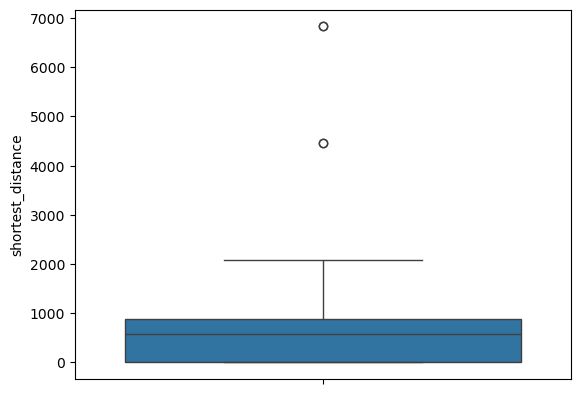

In [132]:
sns.boxplot(data = own_int_gdp['shortest_distance'])

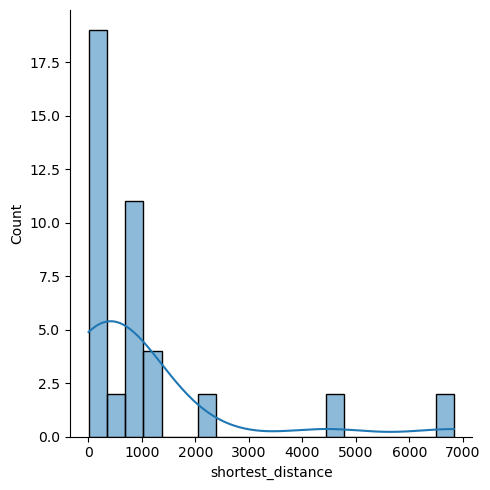

In [130]:
own_int_gdp['shortest_distance'].median()
sns.displot(data = own_int_gdp['shortest_distance'], kde=True, bins = 20)